In [129]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt


In [154]:
def _detick(x):
    if isinstance(x,(float,np.float)):
        return x
    elif x.startswith('\\'):
        return 1.0
    else:
        return 0.0
    
with pd.get_store('/dev/shm/top_dt.h5') as s:
    _df =pd.concat([s.get(k) for k in s.keys()], keys=[k[1:] for k in s.keys()],
                  names=['Target Behaviour',''])
    _df = _df.applymap(_detick)
df = _df.applymap(_detick).groupby(level='Target Behaviour').head(30).groupby(level='Target Behaviour').mean()
_t = df.ix['Mean']
df = df.drop('Mean', axis=0).append(_t)
_diag = lambda df : pd.Series(np.diag(df), index=[df.index])
df['Targeted Response'] = _diag(df['Response Behaviour'])
df

Response Behaviour                                          \
                                MPC       STS    Shadow SlowCoach      Mean   
Target Behaviour                                                              
MPC                        0.892758  0.012642  0.259697  0.536763  0.425465   
STS                        0.599571  0.049546  0.254506  0.427565  0.332797   
Shadow                     0.695151  0.006461  0.424661  0.638734  0.441252   
SlowCoach                  0.523999  0.006334  0.369989  0.695366  0.398922   
Mean                       0.860419  0.021666  0.404830  0.660349  0.486816   

                 Metrics in Synthetic Domain                                \
                                     $Delay$  $P_{RX}$  $P_{TX}$       $S$   
Target Behaviour                                                             
MPC                                 0.700000  0.400000  1.000000  0.433333   
STS                                 0.866667  0.533333  0.566667  0.700000   
Shadow                              0.500000  1.000000  0.633333  0.100000   
SlowCoach                           0.500000  0.766667  0.300000  0.400000   
Mean                                0.566667  1.000000  1.000000  0.400000   

                                                                    \
                       $G$     $PLR$    $INDD$    $INHD$   $Speed$   
Target Behaviour                                                     
MPC               0.400000  0.000000  0.266667  0.633333  0.533333   
STS               0.366667  0.666667  0.300000  0.333333  0.400000   
Shadow            0.600000  0.666667  1.000000  0.566667  0.933333   
SlowCoach         0.666667  0.233333  0.600000  0.033333  1.000000   
Mean              0.566667  0.333333  0.566667  0.233333  1.000000   

                 Targeted Response  
                                    
Target Behaviour                    
MPC                       0.892758  
STS                       0.049546  
Shadow                    0.424661  
SlowCoach                 0.695366  
Mean                      0.486816

In [155]:
df.drop('Response Behaviour', 1)

Metrics in Synthetic Domain                                \
                                     $Delay$  $P_{RX}$  $P_{TX}$       $S$   
Target Behaviour                                                             
MPC                                 0.700000  0.400000  1.000000  0.433333   
STS                                 0.866667  0.533333  0.566667  0.700000   
Shadow                              0.500000  1.000000  0.633333  0.100000   
SlowCoach                           0.500000  0.766667  0.300000  0.400000   
Mean                                0.566667  1.000000  1.000000  0.400000   

                                                                    \
                       $G$     $PLR$    $INDD$    $INHD$   $Speed$   
Target Behaviour                                                     
MPC               0.400000  0.000000  0.266667  0.633333  0.533333   
STS               0.366667  0.666667  0.300000  0.333333  0.400000   
Shadow            0.600000  0.666667  1.000000  0.566667  0.933333   
SlowCoach         0.666667  0.233333  0.600000  0.033333  1.000000   
Mean              0.566667  0.333333  0.566667  0.233333  1.000000   

                 Targeted Response  
                                    
Target Behaviour                    
MPC                       0.892758  
STS                       0.049546  
Shadow                    0.424661  
SlowCoach                 0.695366  
Mean                      0.486816

<IPython.core.display.Javascript object>


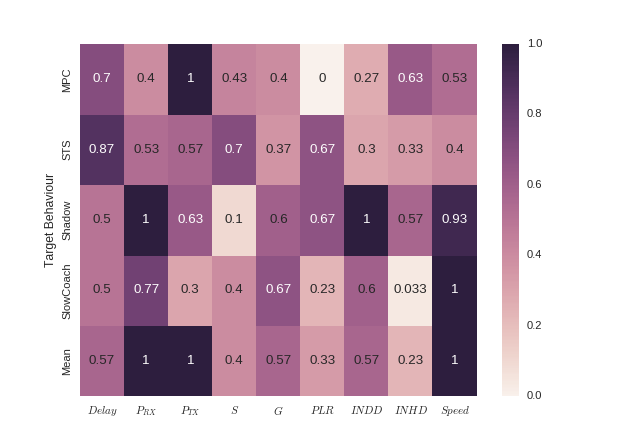

In [193]:
synthdf = df['Metrics in Synthetic Domain']
f,ax = plt.subplots()
sns.heatmap(synthdf, robust=False, annot=True, square=False, ax=ax)
# Here is the label and arrow code of interest
pmid=0.83
cmid=0.34
ax.annotate('Physical', xy=(pmid, -.2), xytext=(pmid, -0.40), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=3.6, lengthB=0.5', lw=2.0))
ax.annotate('Communications', xy=(cmid, -.2), xytext=(cmid, -0.40), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=6.7, lengthB=0.5', lw=2.0))

<IPython.core.display.Javascript object>


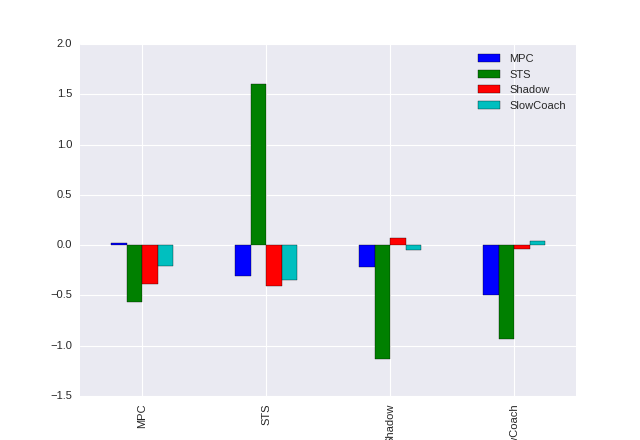

In [78]:
focuses=((df['Response Behaviour']/df['Response Behaviour'].ix['Mean'])-1).drop('Mean', axis=0).drop('Mean', axis=1)
focuses.plot(kind='bar')

<IPython.core.display.Javascript object>


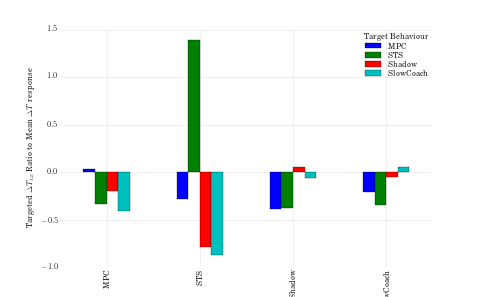

<IPython.core.display.Javascript object>


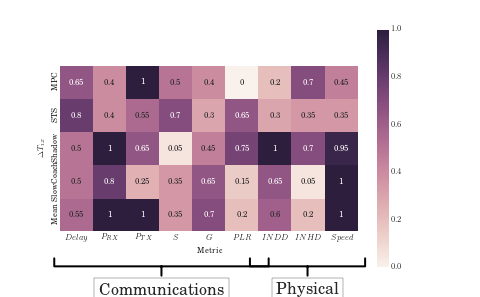

In [212]:
with pd.get_store('/dev/shm/top_dt.h5') as s:
    df = pd.concat([s.get(k) for k in s.keys()], keys=[k[1:] for k in s.keys()], names=['Target Behaviour', ''])
df = df.applymap(_detick).groupby(level='Target Behaviour').head(20).groupby(level='Target Behaviour').mean()
_t = df.ix['Mean']
df = df.drop('Mean', axis=0).append(_t)
from bounos.ChartBuilders import latexify, _texcol, _texfac, format_axes, _latexify_rcparams

figsize = latexify(columns=_texcol, factor=_texfac)
f,ax = plt.subplots(1,1, figsize = figsize)
focuses = ((df['Response Behaviour'] / df['Response Behaviour'].ix['Mean']) - 1).drop('Mean', axis=0).drop('Mean',
                                                                                                           axis=1)
focuses.T.plot(kind='bar', ax=ax)
ax.set_ylabel("Targeted $\Delta T_{ix}$ Ratio to Mean $\Delta T$ response")
ax.set_xlabel("Behaviour under test")
ax = format_axes(ax)

_diag = lambda df: pd.Series(np.diag(df), index=[df.index])

#df['Targeted Response'] = _diag(df['Response Behaviour'])

figsize = latexify(columns=_texcol, factor=_texfac)

fig, ax = plt.subplots(1, 1, figsize=figsize)
with sns.axes_style(_latexify_rcparams):
    sns.heatmap(data=df['Metrics in Synthetic Domain'], ax=ax, annot=True, square=True)
    ax.set_xlabel('Metric')
    ax.set_ylabel('$\Delta T_{ix}$')
    ax = format_axes(ax)
    pmid = 0.83
    cmid = 0.34
    ax.annotate('Physical', xy=(pmid, -.2), xytext=(pmid, -0.40), xycoords='axes fraction',
                fontsize=16, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'),
                arrowprops=dict(arrowstyle='-[, widthB=3.6, lengthB=0.5', lw=2.0))
    ax.annotate('Communications', xy=(cmid, -.2), xytext=(cmid, -0.40), xycoords='axes fraction',
                fontsize=16, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'),
                arrowprops=dict(arrowstyle='-[, widthB=6.7, lengthB=0.5', lw=2.0))


<IPython.core.display.Javascript object>


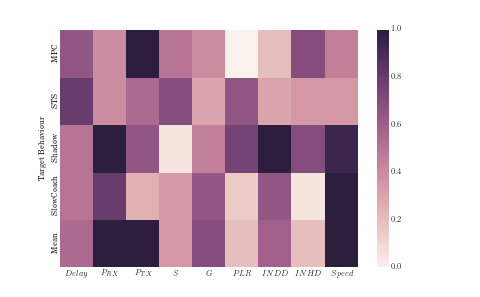

In [211]:
fig, ax = plt.subplots(1, 1)
sns.heatmap(df['Metrics in Synthetic Domain'],ax=ax)
fig.savefig('/dev/shm/test')

In [111]:
_diag = lambda df : pd.Series(np.diag(df), index=[df.index])

_diag(focuses)


MPC          0.017864
STS          1.604449
Shadow       0.068660
SlowCoach    0.044109
dtype: float64

In [82]:
tex = df \
    .to_latex(float_format=lambda x: "{0:1.2f}".format(x), escape=False,
              index=True, column_format="|*{{{}}}{{c|}}".format(df.shape[0])) \
    .split('\n')
tex = '\n'.join(tex)
print tex

\begin{tabular}{|*{5}{c|}}
\toprule
{} & Response Behaviour &       &        &           &      & Metrics in Synthetic Domain &          &          &      &      &       &        &        &         \\
{} &                MPC &   STS & Shadow & SlowCoach & Mean &                     $Delay$ & $P_{RX}$ & $P_{TX}$ &  $S$ &  $G$ & $PLR$ & $INDD$ & $INHD$ & $Speed$ \\
Target Behaviour &                    &       &        &           &      &                             &          &          &      &      &       &        &        &         \\
\midrule
MPC              &               0.89 &  0.01 &   0.25 &      0.54 & 0.42 &                        0.60 &     0.30 &     1.00 & 0.70 & 0.20 &  0.00 &   0.20 &   0.90 &    0.40 \\
Mean             &               0.88 &  0.02 &   0.40 &      0.68 & 0.50 &                        0.50 &     1.00 &     1.00 & 0.50 & 0.60 &  0.00 &   0.60 &   0.00 &    1.00 \\
STS              &               0.61 &  0.06 &   0.24 &      0.44 & 0.34 &             

<IPython.core.display.Javascript object>


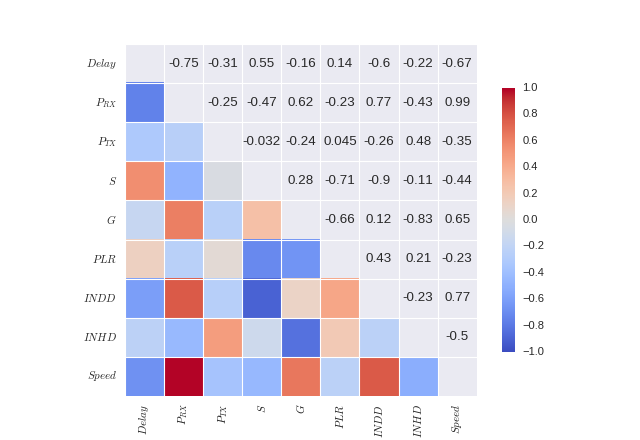

In [100]:
%matplotlib notebook
sns.corrplot(df['Metrics in Synthetic Domain'],diag_names=False)

<IPython.core.display.Javascript object>


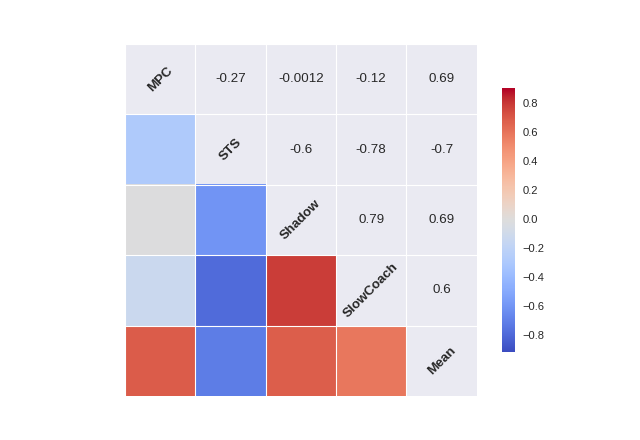

In [52]:
import seaborn as sns
sns.corrplot(df['Response Behaviour'])